# Lab 1
Prepared:
 - **Krzysztof Gwiazda**
 - **Szymon Budziak**

In [1]:
import numpy as np
import pandas as pd

In [2]:
header = [f"A{i}" for i in range(16)]
train_data = pd.read_csv("Data/crx.data", names=header)

### 1. Handle missing values in colums

In [3]:
print(f"Columns quantity: {train_data.shape[0]}")

for col in train_data.columns:
    n_missing = len(train_data.loc[train_data[col]=="?", col])
    print(f"{col} : {n_missing}")
    if n_missing != 0:
        median = train_data[col].mode()[0]
        if median == "?":
            median = train_data.loc[train_data[col] != "?", col].median()
        train_data.loc[train_data[col] == "?", col] = median

Columns quantity: 690
A0 : 12
A1 : 12
A2 : 0
A3 : 6
A4 : 6
A5 : 9
A6 : 9
A7 : 0
A8 : 0
A9 : 0
A10 : 0
A11 : 0
A12 : 0
A13 : 13
A14 : 0
A15 : 0


There are only a few missing values so I will replace them by a median.

### 2. Scatter matrix

In [4]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='A2', ylabel='A2'>,
        <Axes: xlabel='A7', ylabel='A2'>,
        <Axes: xlabel='A10', ylabel='A2'>,
        <Axes: xlabel='A14', ylabel='A2'>],
       [<Axes: xlabel='A2', ylabel='A7'>,
        <Axes: xlabel='A7', ylabel='A7'>,
        <Axes: xlabel='A10', ylabel='A7'>,
        <Axes: xlabel='A14', ylabel='A7'>],
       [<Axes: xlabel='A2', ylabel='A10'>,
        <Axes: xlabel='A7', ylabel='A10'>,
        <Axes: xlabel='A10', ylabel='A10'>,
        <Axes: xlabel='A14', ylabel='A10'>],
       [<Axes: xlabel='A2', ylabel='A14'>,
        <Axes: xlabel='A7', ylabel='A14'>,
        <Axes: xlabel='A10', ylabel='A14'>,
        <Axes: xlabel='A14', ylabel='A14'>]], dtype=object)

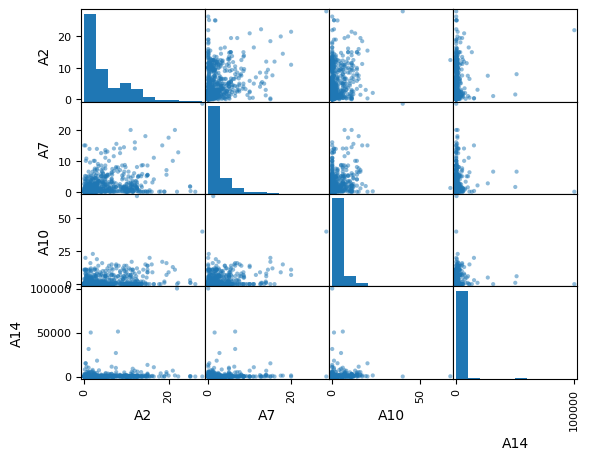

In [5]:
scatter_matrix(train_data)

### 3. Encode columns, dummies and oneHotEncoding

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
train_data["A0"] = le.fit_transform(train_data["A0"])
train_data["A8"] = le.fit_transform(train_data["A8"])
train_data["A9"] = le.fit_transform(train_data["A9"])
train_data["A11"] = le.fit_transform(train_data["A11"])
train_data["A15"] = le.fit_transform(train_data["A15"])

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ["A3", "A4", "A5", "A6","A12"])], remainder='passthrough')

In [11]:
y = train_data["A15"]
train_data = train_data.drop(columns="A15")

In [12]:
X = np.array(ct.fit_transform(train_data))

### 4. Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [14]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [15]:
X_normalized = min_max_scaler.fit_transform(X)
X_standarized = standard_scaler.fit_transform(X)

### 5. Predictions

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, roc_auc_score

In [17]:
def solve(X, name):
    print(name)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y
    )

    classifiers = {
        'Gaussian Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(probability=True)
    }

    roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

    for name, clf in classifiers.items():
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring=roc_auc_scorer)
        mean_score = np.mean(scores)
        print(f'{name}: ROC AUC (train) = {mean_score:.4f}')

        clf.fit(X_train, y_train)
        y_proba = clf.predict_proba(X_test)[:, 1]
        test_score = roc_auc_score(y_test, y_proba)
        print(f'{name}: ROC AUC (test) = {test_score:.4f}')
        print()
    print()
    print()

In [18]:
X_es = [X, X_normalized, X_standarized]
names = ["Without scaling", "Normalized", "Standarized"]

for curr_X, name in zip(X_es, names):
    solve(curr_X, name)

Without scaling
Gaussian Naive Bayes: ROC AUC (train) = 0.8895
Gaussian Naive Bayes: ROC AUC (test) = 0.8846

K-Nearest Neighbors: ROC AUC (train) = 0.7327
K-Nearest Neighbors: ROC AUC (test) = 0.7104

Random Forest: ROC AUC (train) = 0.9181
Random Forest: ROC AUC (test) = 0.9562

Support Vector Machine: ROC AUC (train) = 0.6876
Support Vector Machine: ROC AUC (test) = 0.6995



Normalized
Gaussian Naive Bayes: ROC AUC (train) = 0.8115
Gaussian Naive Bayes: ROC AUC (test) = 0.8352

K-Nearest Neighbors: ROC AUC (train) = 0.8701
K-Nearest Neighbors: ROC AUC (test) = 0.9012

Random Forest: ROC AUC (train) = 0.9183
Random Forest: ROC AUC (test) = 0.9569

Support Vector Machine: ROC AUC (train) = 0.9110
Support Vector Machine: ROC AUC (test) = 0.9351



Standarized
Gaussian Naive Bayes: ROC AUC (train) = 0.7931
Gaussian Naive Bayes: ROC AUC (test) = 0.8068

K-Nearest Neighbors: ROC AUC (train) = 0.8418
K-Nearest Neighbors: ROC AUC (test) = 0.8637

Random Forest: ROC AUC (train) = 0.9139
Ran

Gaussian Naive Bayes: Without scaling

K-Nearest Neighbors: Normalized

Random Forest: Standarized

Support Vector Machine: Normalized

Normalized and standarized results are very similar. The normalized and standarized results are significantly better in K-Nearest Neighbors and Support Vector Machine. It occured that scaling significantly spoiled score of Gaussian Naive Bayes